# Goals Scored and Histogram 

In [1]:
# The total number of goals scored by the team during the 2011 season


In [2]:
# Import sqlite3, load connection and cursor
import sqlite3 
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

In [3]:
# Try to play with the data stats - team wins?
cur.execute("""SELECT TeamName, HomeTeam, AwayTeam, FTR, Date
               FROM Teams_in_Matches
               JOIN Unique_Teams
               USING(Unique_Team_ID)
               JOIN Matches
               USING(Match_ID)
               WHERE Season = 2011
               GROUP BY Match_ID
               ;""")
import pandas as pd
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
print(len(df))
df.head()

992


,TeamName,HomeTeam,AwayTeam,FTR,Date
0,Nurnberg,Nurnberg,Bayern Munich,A,2012-03-31
1,Stuttgart,Stuttgart,Bayern Munich,A,2011-12-11
2,Wolfsburg,Wolfsburg,Bayern Munich,A,2011-08-13
3,Mainz,Mainz,Bayern Munich,H,2011-11-27
4,Freiburg,Freiburg,Bayern Munich,D,2012-02-18


In [4]:
# Try to play with the data stats - team wins?
cur.execute("""SELECT TeamName, HomeTeam, AwayTeam, COUNT(FTR), Date
               FROM Unique_Teams
               JOIN Teams_in_Matches
               USING(Unique_Team_ID)
               JOIN Matches
               USING(Match_ID)
               WHERE Season = 2011
               GROUP BY TeamName
               ORDER BY COUNT(FTR)
               ;""")
import pandas as pd
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
print(len(df))
df.head()

56


,TeamName,HomeTeam,AwayTeam,COUNT(FTR),Date
0,Aachen,Aachen,Fortuna Dusseldorf,34,2011-08-27
1,Augsburg,Augsburg,Hoffenheim,34,2011-08-20
2,Bayern Munich,Bayern Munich,Hoffenheim,34,2012-03-10
3,Bochum,Bochum,Fortuna Dusseldorf,34,2011-12-10
4,Braunschweig,Braunschweig,Fortuna Dusseldorf,34,2011-10-03


In [5]:
# Try to play with the data stats - team wins?
cur.execute("""SELECT TeamName, SUM(FTHG) AS HomeGoals, SUM(FTAG) AS AwayGoals, COUNT(FTR)
               FROM Unique_Teams
               JOIN Teams_in_Matches
               USING(Unique_Team_ID)
               JOIN Matches
               USING(Match_ID)
               WHERE Season = 2011
               GROUP BY TeamName
               ORDER BY COUNT(FTR)
               ;""")
import pandas as pd
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
print(len(df))
df

56


,TeamName,HomeGoals,AwayGoals,COUNT(FTR)
0,Aachen,38,39,34
1,Augsburg,50,35,34
2,Bayern Munich,65,34,34
3,Bochum,55,41,34
4,Braunschweig,41,31,34
5,Cottbus,42,37,34
6,Dortmund,57,48,34
7,Dresden,62,40,34
8,Duisburg,52,37,34
9,Ein Frankfurt,59,50,34


In [6]:
import matplotlib.pyplot as plt
ax = df[['HomeGoals', 'AwayGoals']].plot(kind='bar', title ="Goals", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Teams", fontsize=12)
ax.set_ylabel("Goals Scored", fontsize=12)
plt.show()

<Figure size 1500x1000 with 1 Axes>

Text(0, 0.5, 'Goals Scored')

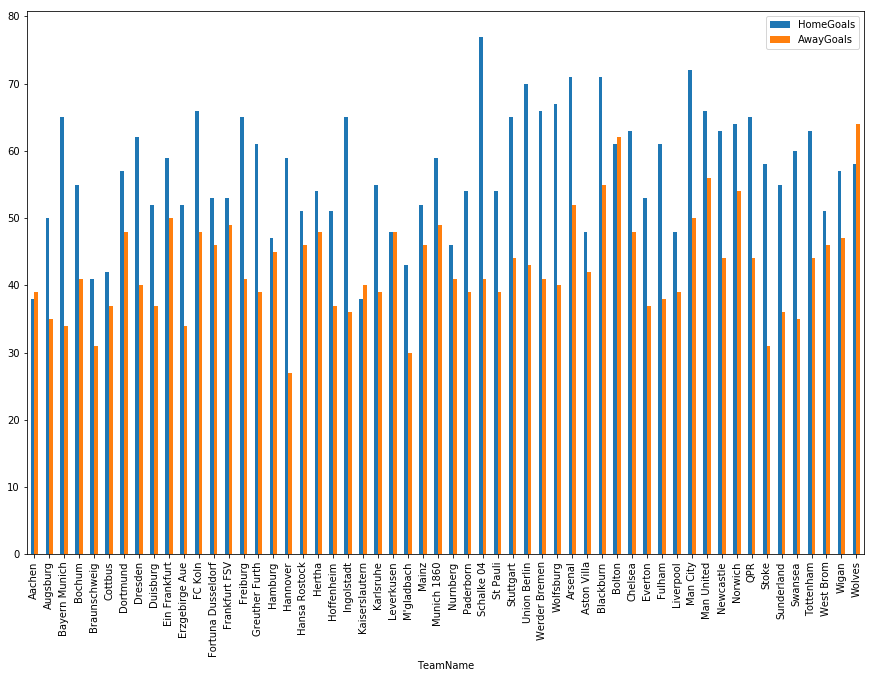

In [7]:
df.plot.bar(x ='TeamName', y=['HomeGoals', 'AwayGoals'],figsize=(15, 10))
ax.set_ylabel("Goals Scored", fontsize=12)

In [11]:
# Try to play with the data stats - team wins?
cur.execute("""SELECT TeamName, SUM(FTHG) + SUM(FTAG) AS Total_Goals, COUNT(FTR)
               FROM Unique_Teams
               JOIN Teams_in_Matches
               USING(Unique_Team_ID)
               JOIN Matches
               USING(Match_ID)
               WHERE Season = 2011
               GROUP BY TeamName
               ORDER BY Total_Goals DESC
               ;""")
import pandas as pd
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
print(len(df))
df

56


,TeamName,Total_Goals,COUNT(FTR)
0,Blackburn,126,38
1,Arsenal,123,38
2,Bolton,123,38
3,Man City,122,38
4,Man United,122,38
5,Wolves,122,38
6,Norwich,118,38
7,Schalke 04,118,34
8,FC Koln,114,34
9,Union Berlin,113,34


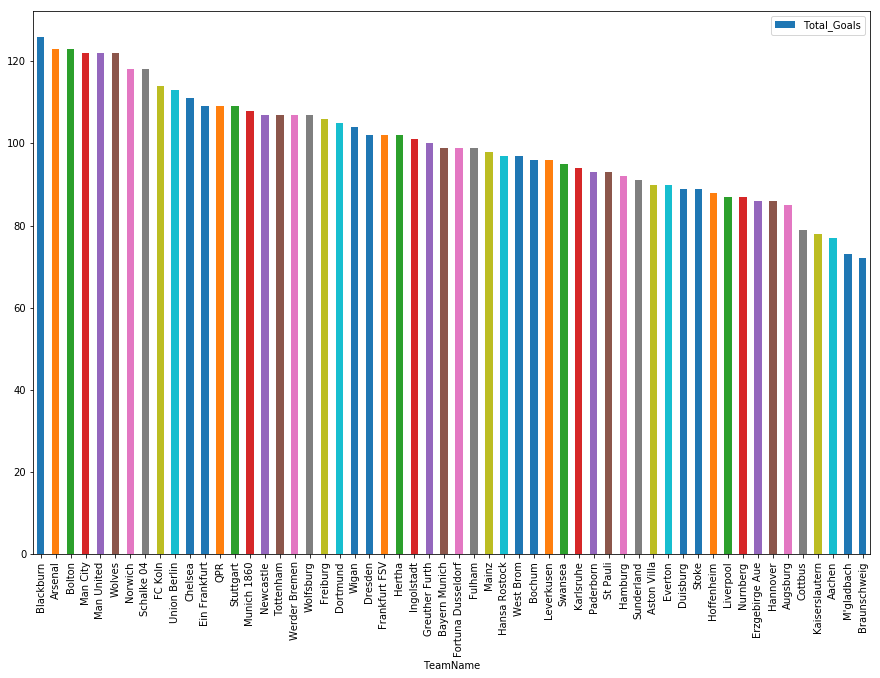

In [9]:
df.plot.bar(x ='TeamName', y='Total_Goals',figsize=(15, 10))